# *k*-Nearest Neighbors

เราจะมาลองใช้ข้อมูล Iris สร้างโมเดล *k*-NN กัน โดยข้อมูลนี้ Scikit-Learn มีติดกับแพ็คเกจมาให้แล้ว

In [2]:
%matplotlib inline

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, classification_report

โหลดข้อมูล Iris แล้วก็เตรียมข้อมูลสำหรับ training และ testing โดยข้อมูลทั้งหมดมี 150 ข้อมูล แบ่งไปสำหรับ training 120 ข้อมูล และสำหรับ testing อีก 30 ข้อมูล

In [3]:
np.random.seed(0)

iris = datasets.load_iris()
X, y = iris.data, iris.target

indices = np.random.permutation(len(X))

X_train = X[indices[:-30]]
y_train = y[indices[:-30]]

X_test = X[indices[-30:]]
y_test = y[indices[-30:]]

เราสามารถดูได้ว่าข้อมูล Iris ที่เค้าให้มานั้น มี feature อะไรบ้าง

In [4]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


มีคลาสอะไรบ้าง

In [5]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


เราจะเริ่มสร้างโมเดล *k*-NN กัน โดยจะเลือกจำนวนเพื่อนบ้าน 15 ตัว

In [6]:
n_neighbors = 15

knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform')

หลังจากโมเดลเสร็จ ลองทดสอบดูว่าโมเดลของเราจะบอกได้ไหมว่าดอกไอริชที่มีกลีบเลี้ยงขนาด 3x5 ซม. และกลีบดอกขนาด 4x2 ซม. เป็นดอกไอริชประเภทไหน

In [7]:
result = knn.predict([[3, 5, 4, 2],])
print iris.target_names[result]

['versicolor']


ทีนี้เราลองมาดูค่าความแม่นยำที่โมเดลที่เราสร้างขึ้นมาเป็นอย่างไรบ้าง โดยจะทดสอบกับชุดข้อมูลสำหรับ testing ที่เราแยกไว้ตั้งแต่ตอนต้น

In [8]:
y_pred = knn.predict(X_test)

print accuracy_score(y_test, y_pred)

0.966666666667


เราสามารถดูค่าเมตริกต่างๆ จากโมเดลของเราได้เช่นกัน

In [9]:
target_names = iris.target_names
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.91      0.95        11
  virginica       0.90      1.00      0.95         9

avg / total       0.97      0.97      0.97        30



ทีนี้เรามาลองสร้าง Visualization จากโมเดลที่เราสร้างขึ้นดู

In [10]:
X = iris.data[:, :2] # take only two features
y = iris.target
h = .02 # step size in the mesh

In [11]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [12]:
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform')

พล็อต decision boundary

In [13]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

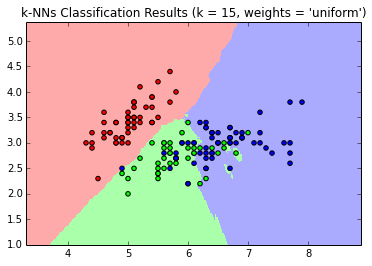

In [14]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NNs Classification Results (k = %i, weights = '%s')" % (15, 'uniform'))
plt.show()